In [9]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
class ShowData():
    def __init__(self, file):
        self.data = pd.read_csv(file)

    def CurrentData(self):
        return self.data

    def Distribution(self, col_name):
        unique_types = self.data[col_name].nunique()
        print(unique_types)
        self.data[col_name].hist(bins= unique_types) 
    
    def AVGData(self, col_name):
        self.data[col_name].plot.box() 
        
    def DeleteColumn(self, col_names):
        if isinstance(col_names, str):
            col_names = [col_names]
        self.data.drop(columns=col_names, axis=1, inplace = True)
    
    def ShowMatrix(self):
        correlations = self.data.corr()
        fig, ax = plt.subplots(figsize=(10, 10))
        colormap = sns.color_palette("BrBG", 10)
        sns.heatmap(correlations, 
            cmap=colormap, 
            annot=True, 
            fmt=".2f")
        ax.set_yticklabels(self.data.columns)
        plt.show()

    
    

In [11]:
data = ShowData('cancer_patient_data_sets.csv')
data.CurrentData().head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


40


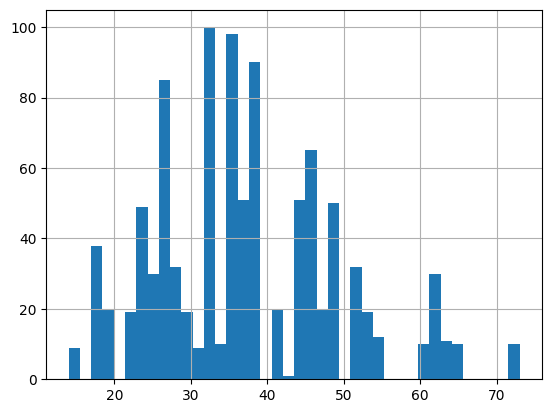

In [12]:
data.Distribution('Age')

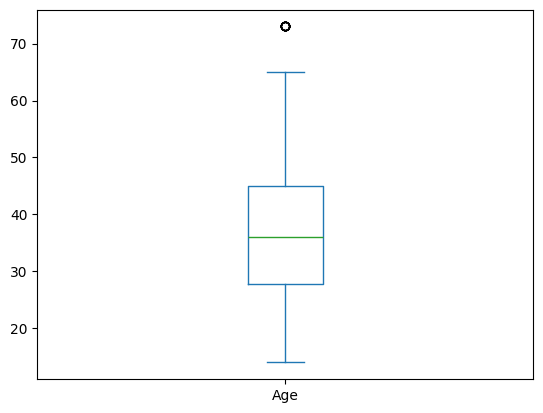

In [13]:
data.AVGData('Age')

In [14]:
data.DeleteColumn('index')
data.DeleteColumn(['Patient Id','Gender','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet','Chest Pain','Coughing of Blood','Fatigue','Shortness of Breath','Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring'])

data.CurrentData().head()

,Age,Air Pollution,Alcohol use,Obesity,Smoking,Passive Smoker,Weight Loss,Level
0,33,2,4,4,3,2,4,Low
1,17,3,1,2,2,4,3,Medium
2,35,4,5,7,2,3,7,High
3,37,7,7,7,7,7,2,High
4,46,6,8,7,8,7,2,High


In [15]:
try:
    # Reverse mapping from numerical values back to string labels
    reverse_maps = {0: 'Low', 1: 'Medium', 2: 'High'}
    data.CurrentData()['Level'] = data.CurrentData()['Level'].apply(lambda x: reverse_maps[x])

except:
    # Apply mapping from string labels to numerical values
    maps = {'Low': 0, 'Medium': 1, 'High': 2}
    data.CurrentData()['Level'] = data.CurrentData()['Level'].apply(lambda x: maps[x])

data.CurrentData()['Level']

0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64

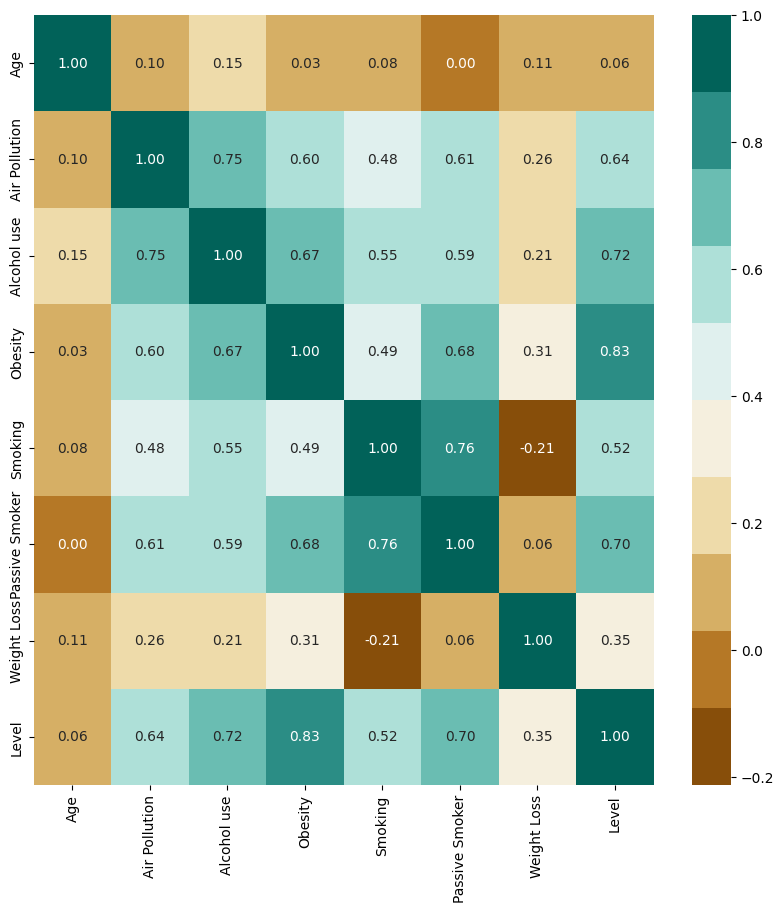

In [16]:
data.ShowMatrix()

In [17]:
class MainTrainingModel:
    def __init__(self, training_set, labels_training_set):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(training_set, labels_training_set, test_size=0.20, random_state=12345)

    # universal method for training and evaluation of models
    def train_model(self, classifier, feature_vector_train, label, feature_vector_valid):
        # train model
        classifier.fit(feature_vector_train, label)
        
        # generate labels for validation set
        predictions = classifier.predict(feature_vector_valid)
        
        # evealuate model based on test set labels
        scores = list(metrics.precision_recall_fscore_support(predictions, self.y_test))
        score_vals = [
            scores[0][0],
            scores[1][0],
            scores[2][0]
        ]
        score_vals.append(metrics.accuracy_score(predictions, self.y_test))
        return score_vals
    
    # MODEL 1 - logistic regression
    def LogisticRegression(self):
        accuracy = self.train_model(linear_model.LogisticRegression(), self.X_train, self.y_train, self.X_test)
        self.accuracy_compare = {'LR': accuracy}
        print ("LR: ", accuracy)

    # MODEL 2 - Support Vector Machine
    def SupportVectorMachine(self):
        accuracy = self.train_model(svm.SVC(), self.X_train, self.y_train, self.X_test)
        self.accuracy_compare['SVM'] = accuracy
        print ("SVM" , accuracy)

    # MODEL 3 - neural network
    def NeutralNetwork(self):
        from sklearn.neural_network import MLPClassifier
        mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
        accuracy = self.train_model(mlp, self.X_train, self.y_train, self.X_test)
        self.accuracy_compare['neural network'] = accuracy
        print ("neural network" , accuracy)

    # compare models
    def ShowData(self):
        df_compare = pd.DataFrame(self.accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
        df_compare.plot(kind='bar')

    def ShowAllDataModles(self):
        self.LogisticRegression()
        self.SupportVectorMachine()
        self.NeutralNetwork()
        self.ShowData()




In [18]:
# create training set
X = data.CurrentData().drop('Level', axis=1).to_numpy()
# create labels for training set
y = data.CurrentData().loc[:, 'Level'].to_numpy()

c:\Users\marek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR:  [0.8676470588235294, 0.7375, 0.7972972972972973, 0.845]
SVM [0.8970588235294118, 0.7625, 0.8243243243243242, 0.785]
neural network [0.9705882352941176, 1.0, 0.9850746268656716, 0.99]


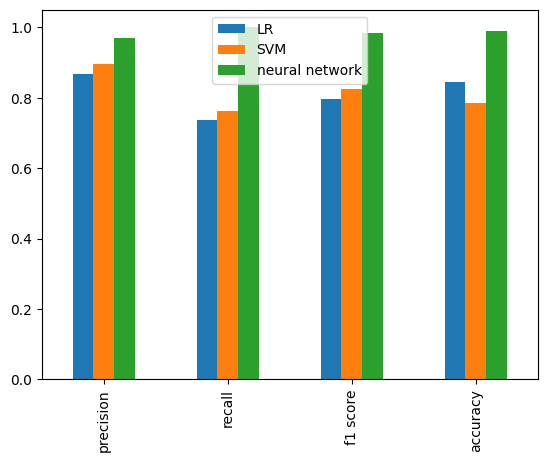

In [19]:
model = MainTrainingModel(X,y)

model.ShowAllDataModles()
